In [1]:
import pandas as pd
import numpy as np

In [2]:
file=pd.DataFrame()
for i in range(10):
    f1=pd.read_csv('/home/yazi/Documents/stage/data/car_afc_train/train'+str(i)+'_first.csv',delimiter=';',encoding='iso 8859-1',dtype=str)
    f2=pd.read_csv('/home/yazi/Documents/stage/data/car_afc_train/train'+str(i)+'_last.csv',delimiter=';',encoding='iso 8859-1',dtype=str)
    file=pd.concat([f1,f2,file],ignore_index=True)

In [3]:
data1_true=pd.read_csv('/home/yazi/Documents/stage/data/data1_true.csv',delimiter=';',encoding='iso 8859-1')
data2_true=pd.read_csv('/home/yazi/Documents/stage/data/data2_true.csv',delimiter=';',encoding='iso 8859-1')
data1_false=pd.read_csv('/home/yazi/Documents/stage/data/data1_false.csv',delimiter=';',encoding='iso 8859-1')
data2_false=pd.read_csv('/home/yazi/Documents/stage/data/data2_false.csv',delimiter=';',encoding='iso 8859-1')

In [4]:
Data_Train=pd.concat([data1_true,data2_true,data1_false,data2_false],ignore_index=True)
Data_Train

,Ot,Dt,DUREE,NBTRAJTC,dist,parking
0,18300.0,19800.0,1500.0,1.0,20362.956563,1
1,34200.0,35340.0,1140.0,1.0,1941.648784,1
2,36000.0,37800.0,1800.0,2.0,23648.467181,1
3,27000.0,31800.0,4800.0,3.0,35474.638828,1
4,27000.0,32400.0,5400.0,3.0,35713.582850,1
5,30000.0,32400.0,2400.0,1.0,13400.000000,1
6,27900.0,33600.0,5700.0,3.0,32614.260685,1
7,48600.0,51300.0,2700.0,1.0,16319.620094,1
8,19800.0,22500.0,2700.0,1.0,19009.471324,1
9,30000.0,30300.0,300.0,2.0,100.000000,1


# XGBoost

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, f1_score, precision_recall_curve
from sklearn.model_selection import GridSearchCV
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def show_data(cm, print_res = 0):
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    if print_res == 1:
        print('Precision =     {:.3f}'.format(tp/(tp+fp)))
        print('Recall (TPR) =  {:.3f}'.format(tp/(tp+fn)))
        print('Fallout (FPR) = {:.3e}'.format(fp/(fp+tn)))
    return tp/(tp+fp), tp/(tp+fn), fp/(fp+tn)

In [6]:
X = Data_Train.drop('parking', axis=1)
y = Data_Train['parking']

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.5958114 , -1.66829122, -0.57514726, -0.89708632,  0.93431633],
       [-0.77721666, -0.86264201, -0.75408122, -0.89708632, -0.61836558],
       [-0.68454556, -0.73510681, -0.42603562,  0.23129809,  1.21124307],
       ...,
       [ 0.75185653,  0.88241283,  1.21419238,  0.23129809,  2.31540661],
       [ 1.55500608,  1.58230113,  0.17041092,  0.23129809,  2.29709521],
       [ 1.81757421,  1.78449109, -0.42603562, -0.89708632, -0.29098065]])

In [8]:
y

0        1
1        1
2        1
3        1
4        1
        ..
21514    0
21515    0
21516    0
21517    0
21518    0
Name: parking, Length: 21519, dtype: int64

# Part1

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [10]:
cv_params = {'max_depth': [1,2,3,4,5,6], 'min_child_weight': [1,2,3,4]}    # parameters to be tries in the grid search
fix_params = {'learning_rate': 0.2, 'n_estimators': 100, 'objective': 'binary:logistic'}   #other parameters, fixed for the moment 
csv = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = 'f1', cv = 5)

In [11]:
csv.fit(X_train, y_train)

/home/yazi/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.2, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'min_child_weight': [1, 2, 3, 4]},
             pre_dispatch='2*n_jobs', refit=True,

In [12]:
csv.best_params_

{'max_depth': 6, 'min_child_weight': 2}

In [13]:
cv_params = {'subsample': [0.8,0.9,1], 'max_delta_step': [0,1,2,4]}
fix_params = {'learning_rate': 0.2, 'n_estimators': 100, 'objective': 'binary:logistic', 'max_depth': 6, 'min_child_weight':3}

In [14]:
csv = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = 'f1', cv = 5) 
csv.fit(X_train, y_train)
csv.scorer_ 
csv.best_params_

{'max_delta_step': 0, 'subsample': 0.9}

In [15]:
csv.cv_results_ 

{'mean_fit_time': array([0.84409404, 0.8215785 , 0.76258574, 0.84901066, 0.8441915 ,
        0.79593253, 0.87786198, 0.86048293, 0.80864038, 0.89741797,
        0.86769285, 0.82250175]),
 'std_fit_time': array([0.01132   , 0.01950478, 0.01445379, 0.00583083, 0.02145005,
        0.01385242, 0.00750686, 0.01286719, 0.01662673, 0.01160976,
        0.00859247, 0.0114196 ]),
 'mean_score_time': array([0.01909366, 0.01911902, 0.01942945, 0.0183383 , 0.018854  ,
        0.01826801, 0.01956005, 0.01961713, 0.0194273 , 0.01979313,
        0.01914196, 0.01916499]),
 'std_score_time': array([0.00046909, 0.00065389, 0.00068834, 0.00010195, 0.00015661,
        0.0007456 , 0.00038483, 0.00060643, 0.00085873, 0.00058992,
        0.00042343, 0.0007148 ]),
 'param_max_delta_step': masked_array(data=[0, 0, 0, 1, 1, 1, 2, 2, 2, 4, 4, 4],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=o

In [16]:
cv_params = {'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]}
fix_params['max_delta_step'] = 0
fix_params['subsample'] = 0.8

In [17]:
csv = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = 'f1', cv = 5) 
csv.fit(X_train, y_train)
csv.best_params_

{'learning_rate': 0.3}

In [18]:
fix_params['learning_rate'] = 0.2
params_final =  fix_params
print(params_final)

{'learning_rate': 0.2, 'n_estimators': 100, 'objective': 'binary:logistic', 'max_depth': 6, 'min_child_weight': 3, 'max_delta_step': 0, 'subsample': 0.8}


In [19]:
xgdmat_train = xgb.DMatrix(X_train, y_train)
xgdmat_test = xgb.DMatrix(X_test, y_test)
xgb_final = xgb.train(params_final, xgdmat_train, num_boost_round = 100)

/home/yazi/anaconda3/envs/tf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


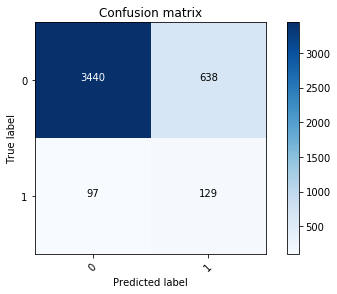

Precision =     0.168
Recall (TPR) =  0.571
Fallout (FPR) = 1.564e-01


In [20]:
y_pred = xgb_final.predict(xgdmat_test)
thresh = 0.08
y_pred [y_pred > thresh] = 1
y_pred [y_pred <= thresh] = 0
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, ['0', '1'], )
pr, tpr, fpr = show_data(cm, print_res = 1);

# Part2

In [21]:
len(X)

21519

In [22]:
import collections

In [23]:
collections.Counter(y)

Counter({1: 1108, 0: 20411})

In [24]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_res,y_res=sm.fit_resample(X,y)

In [25]:
collections.Counter(y_res)

Counter({1: 20411, 0: 20411})

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2)

In [27]:
cv_params = {'max_depth': [1,2,3,4,5,6], 'min_child_weight': [1,2,3,4]}    # parameters to be tries in the grid search
fix_params = {'learning_rate': 0.2, 'n_estimators': 100, 'objective': 'binary:logistic'}   #other parameters, fixed for the moment 
csv = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = 'f1', cv = 5)

In [28]:
csv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.2, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'min_child_weight': [1, 2, 3, 4]},
             pre_dispatch='2*n_jobs', refit=True,

In [29]:
csv.best_params_

{'max_depth': 6, 'min_child_weight': 3}

In [30]:
cv_params = {'subsample': [0.8,0.9,1], 'max_delta_step': [0,1,2,4]}
fix_params = {'learning_rate': 0.2, 'n_estimators': 100, 'objective': 'binary:logistic', 'max_depth': 6, 'min_child_weight':2}

In [31]:
csv = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = 'f1', cv = 5) 
csv.fit(X_train, y_train)
csv.best_params_

{'max_delta_step': 2, 'subsample': 1}

In [32]:
cv_params = {'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]}
fix_params['max_delta_step'] = 0
fix_params['subsample'] = 0.9

In [33]:
csv = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = 'f1', cv = 5) 
csv.fit(X_train, y_train)
csv.best_params_

{'learning_rate': 0.3}

In [34]:
fix_params['learning_rate'] = 0.25
params_final =  fix_params
print(params_final)

{'learning_rate': 0.25, 'n_estimators': 100, 'objective': 'binary:logistic', 'max_depth': 6, 'min_child_weight': 2, 'max_delta_step': 0, 'subsample': 0.9}


In [35]:
xgdmat_train = xgb.DMatrix(X_train, y_train)
xgdmat_test = xgb.DMatrix(X_test, y_test)
xgb_final = xgb.train(params_final, xgdmat_train, num_boost_round = 100)

In [62]:
print(params_final)

{'learning_rate': 0.25, 'n_estimators': 100, 'objective': 'binary:logistic', 'max_depth': 6, 'min_child_weight': 2, 'max_delta_step': 0, 'subsample': 0.9}


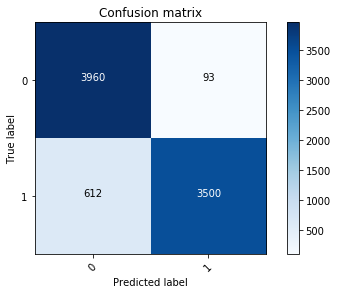

Precision =     0.974
Recall (TPR) =  0.851
Fallout (FPR) = 2.295e-02


In [63]:
y_pred = xgb_final.predict(xgdmat_test)
thresh = 0.7
y_pred [y_pred > thresh] = 1
y_pred [y_pred <= thresh] = 0
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, ['0', '1'], )
pr, tpr, fpr = show_data(cm, print_res = 1);

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
def show_result(y_test,y_pred):
    y_test=np.squeeze(y_test)
    y_pred=np.squeeze(y_pred)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [65]:
y_pred

array([0., 0., 1., ..., 1., 0., 0.], dtype=float32)

In [66]:
y_test

array([0, 0, 1, ..., 1, 0, 0])

In [67]:
show_result(y_test,y_pred)

[[3960   93]
 [ 612 3500]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      4053
           1       0.97      0.85      0.91      4112

    accuracy                           0.91      8165
   macro avg       0.92      0.91      0.91      8165
weighted avg       0.92      0.91      0.91      8165



# test normal sample

In [37]:
X0_test = xgb.DMatrix(X)

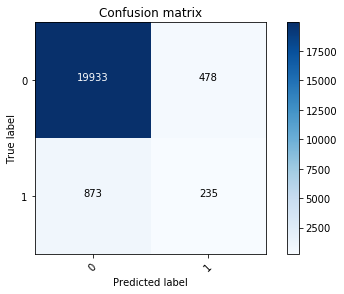

Precision =     0.330
Recall (TPR) =  0.212
Fallout (FPR) = 2.342e-02


In [38]:
y_pred = xgb_final.predict(X0_test)
thresh = 0.65
y_pred [y_pred > thresh] = 1
y_pred [y_pred <= thresh] = 0
cm = confusion_matrix(y, y_pred)
plot_confusion_matrix(cm, ['0', '1'], )
pr, tpr, fpr = show_data(cm, print_res = 1);

# Prediction on AFC

In [51]:
scaler = StandardScaler()
X0 = scaler.fit_transform(file)
X0

array([[-1.10165604, -1.21512452, -0.17738113,  0.85520398, -0.11471561],
       [-0.12573111,  1.1976657 ,  2.8932032 ,  3.28815296,  0.73442831],
       [-1.09977777,  0.47995172,  3.51393893,  0.85520398, -0.38551987],
       ...,
       [ 0.7737926 ,  0.67654986, -0.26117054,  0.24696674,  2.43363096],
       [ 0.78528316,  0.68837531, -0.26117054,  0.24696674,  2.43363096],
       [ 0.74142013,  0.64323392, -0.26117054,  0.24696674,  2.43363096]])

In [52]:
help(xgb_final)

Help on Booster in module xgboost.core object:

class Booster(builtins.object)
 |  Booster(params=None, cache=(), model_file=None)
 |  
 |  A Booster of XGBoost.
 |  
 |  Booster is the model of xgboost, that contains low level routines for
 |  training, prediction and evaluation.
 |  
 |  Methods defined here:
 |  
 |  __copy__(self)
 |  
 |  __deepcopy__(self, _)
 |  
 |  __del__(self)
 |  
 |  __getstate__(self)
 |  
 |  __init__(self, params=None, cache=(), model_file=None)
 |      Parameters
 |      ----------
 |      params : dict
 |          Parameters for boosters.
 |      cache : list
 |          List of cache items.
 |      model_file : string
 |          Path to the model file.
 |  
 |  __setstate__(self, state)
 |  
 |  attr(self, key)
 |      Get attribute string from the Booster.
 |      
 |      Parameters
 |      ----------
 |      key : str
 |          The key to get attribute from.
 |      
 |      Returns
 |      -------
 |      value : str
 |          The attribute 

In [53]:
X0_final = xgb.DMatrix(X0)

In [54]:
X0_final

In [55]:
y_pred = xgb_final.predict(X0_final)

In [56]:
y_pred

array([0.6610329 , 0.38929743, 0.20856874, ..., 0.8410979 , 0.8427293 ,
       0.5514846 ], dtype=float32)

In [57]:
thresh=0.7
y_pred [y_pred > thresh] = 1
y_pred [y_pred <= thresh] = 0

In [58]:
collections.Counter(y_pred)

Counter({0.0: 205692, 1.0: 140018})

In [68]:
140018/(205692+140018)

0.4050157646582396